<a href="https://colab.research.google.com/github/abdoali2002/AI-ML/blob/main/Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

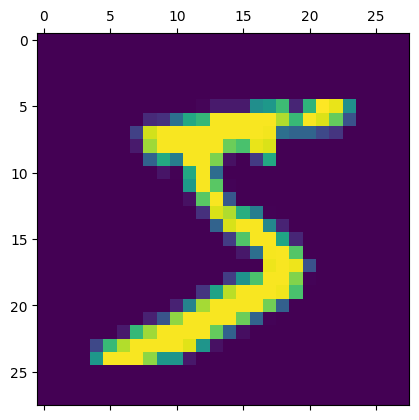

In [5]:
plt.matshow(X_train[0])

In [6]:
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

We have to convert the 2D array of pixels into a 1D array so they can act as the input layer of neurons

In [7]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape

(10000, 784)

In [8]:
X_train = X_train / 255
X_test = X_test / 255



ANN

https://www.tensorflow.org/guide/keras/sequential_model

    we use Sequential model since our input layer is simply a stack of neurons

    a dense layer is one where all the input neurons are connected to the output neurons per image, there are 784 input neurons and 10 output neurons

    we use sparse_categorial_crossentropy as a loss function since our output will be a single number (if the output was an array like in one-hot encoding, we would use categorical_crossentropy)



In [9]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape=(784,), activation = "softmax")
])

model.compile(

    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [10]:
model.fit(X_train_flat, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 9.9057 - accuracy: 0.8374
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 6.2701 - accuracy: 0.8770
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.7905 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.5031 - accuracy: 0.8823
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3693 - accuracy: 0.8845


In [11]:
model.evaluate(X_train_flat, Y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 4.5952 - accuracy: 0.8912


[4.5952043533325195, 0.8911833167076111]

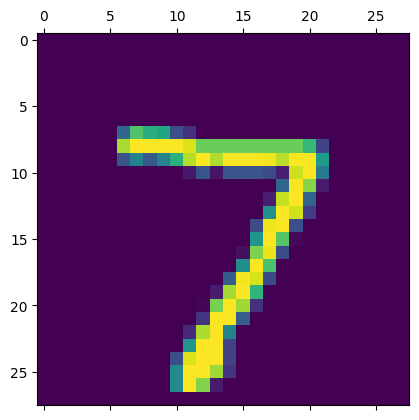

In [12]:
plt.matshow(X_test[0])

In [13]:
Y_predicted = model.predict(X_test_flat)
Y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.1979683e-36,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [14]:
np.argmax(Y_predicted[0])

7

In [15]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [17]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 938,    0,   13,    2,    2,    3,   11,    0,    8,    3],
       [   0, 1110,   10,    1,    1,    1,    3,    1,    8,    0],
       [   1,   18,  945,    9,   18,    2,    8,    3,   26,    2],
       [   1,    6,   48,  889,    6,   29,    3,    5,   18,    5],
       [   1,    2,   14,    1,  951,    0,    0,    2,    7,    4],
       [  13,    2,   18,   52,   18,  727,   14,    3,   36,    9],
       [   7,    2,   28,    1,   18,   11,  887,    0,    4,    0],
       [   1,   12,   40,   11,   21,    1,    0,  893,    5,   44],
       [   3,   21,   59,   28,   23,   25,   12,    6,  785,   12],
       [   5,   11,   10,   15,  151,    4,    0,   21,   13,  779]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

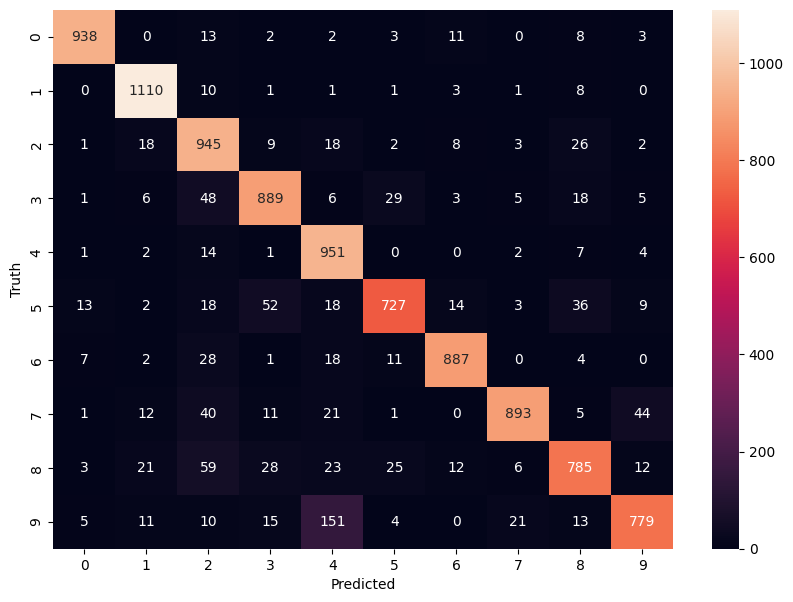

In [18]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Now we'll try again but this time with a hidden layer, to see how the accuracy will improve

In [19]:
model2 = keras.Sequential([
                  keras.layers.Dense(128, input_shape=(784,), activation = "relu"),
                  keras.layers.Dense(10, activation = "sigmoid")
])

model2.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model2.fit(X_train_flat, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4745 - accuracy: 0.8669
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3653 - accuracy: 0.9134
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2863 - accuracy: 0.9286
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2506 - accuracy: 0.9362
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2351 - accuracy: 0.9399


In [20]:
model2.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.9262


[0.32869651913642883, 0.9261999726295471]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

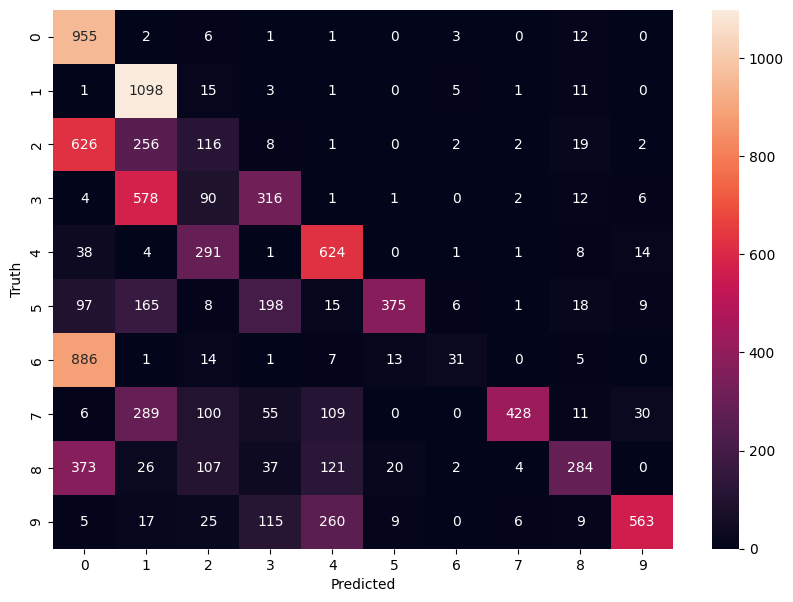

In [21]:
Y_predicted2 = model2.predict(X_test_flat)
Y_predicted2_labels = [np.argmax(i) for i in Y_predicted2]
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted2_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")
#using sigmoid instead of softmax gives us this CM

We can try it with CNN

Conv2D is the convolution layer that will extract the features.

Then we'll pool using MaxPooling but other types can be used like average.

Softmax is the activation function used instead of sigmoid, softmax will divide the value by the total of all the values of the neurons, so the sum of them will be 1. Ex:
#1 0.47
#2 0.84

sigmoid will output #1: 0.47
                    #2: 0.84
                total = 1.31

softmax will output #1: 0.47 / (0.47+0.84) = 0.358778625954
                    #2: 0.84 / (0.47+0.84) = 0.641221374046
                                    total  = 1

In [22]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(input_shape=()),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1570 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0575 - accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0373 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0256 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0174 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0128 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0068 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0068 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 39s 21m

In [23]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 30)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5070)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               507100    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
________________________________________________

In [24]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0479 - accuracy: 0.9880


[0.04787413030862808, 0.9879999756813049]

313/313 [==============================] - 2s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

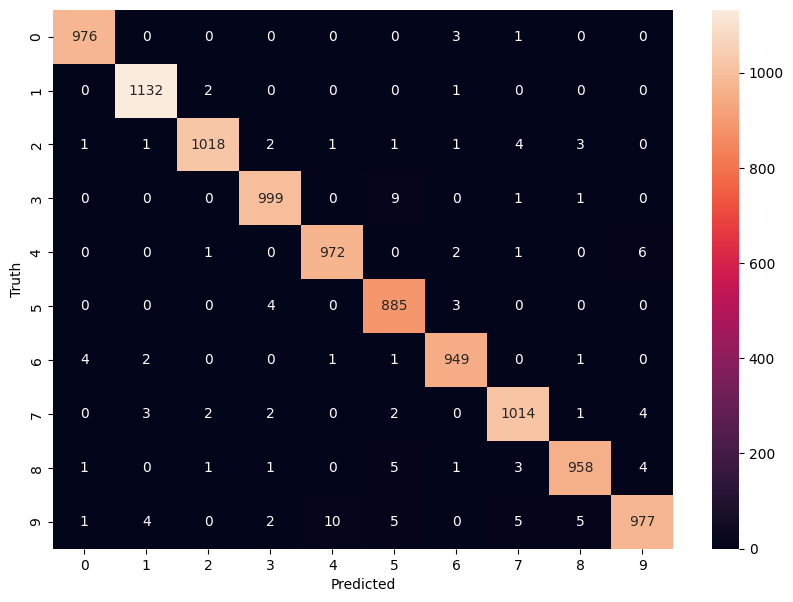

In [25]:
Y_predicted = cnn.predict(X_test)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [26]:
from sklearn.metrics import classification_report
import numpy as np

print("Classification Report: \n", classification_report(Y_test, Y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



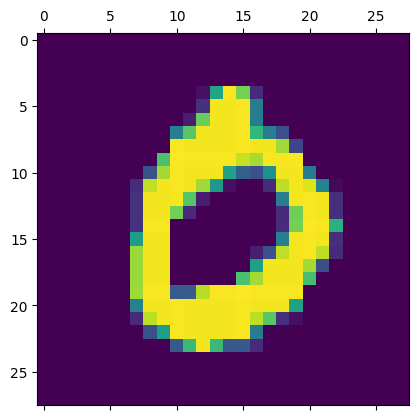

In [27]:
plt.matshow(X_test[3])

In [28]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[2.95930124e-15, 5.98811885e-12, 1.32796618e-09, 2.71930101e-09,
        2.13394862e-12, 5.22525870e-13, 2.75514701e-20, 9.99999940e-01,
        5.37212184e-11, 6.75855205e-11],
       [4.50939504e-14, 5.06335043e-11, 9.99999940e-01, 3.80313327e-18,
        2.59106903e-18, 2.03362912e-18, 1.04668895e-14, 2.03977859e-22,
        5.92539400e-15, 6.63223786e-20],
       [3.04389758e-08, 9.99991238e-01, 6.41598952e-09, 6.73226503e-13,
        2.13154090e-06, 5.64929492e-10, 8.71506387e-08, 3.23529179e-07,
        6.03570652e-06, 9.79186801e-11],
       [9.99999940e-01, 3.41352651e-13, 8.45867300e-12, 6.01285025e-16,
        2.16039141e-13, 1.54150945e-11, 3.83410503e-09, 5.06777746e-14,
        7.27968914e-15, 1.69025918e-10],
       [1.11931697e-11, 2.71270094e-13, 3.84882474e-13, 4.69804588e-13,
        9.99999940e-01, 1.81509115e-12, 3.71056449e-11, 4.36632987e-11,
        5.92851462e-11, 1.02558184e-09]], dtype=float32)

In [29]:
Y_numbers = [np.argmax(i) for i in Y_pred]
Y_numbers[:5]

[7, 2, 1, 0, 4]

In [30]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)